# 《按图索骥学机器学习》-《A10_K近邻算法》

这是《按图索骥学机器学习》-《A10_K近邻算法》的讲义
这门课程之所以叫按图索骥，是因为学习资料都放到了思维导图当中，大家可以根据自己的情况，选择合适的学习路径，自主学习

![avatar](pic/swnt.png)

导图和有关学习资料都放在了github(git.code946.com)上，并且在不断迭代和更新中

In [1]:
from sklearn.datasets import load_iris

# 使用加载器读取数据并且存入变量iris。
iris = load_iris()

print(iris["DESCR"])

for i in range(0,iris.target.shape[0]) :
    print(iris.data[i],iris.target[i])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25)

# 对训练和测试的特征数据进行标准化。
std_x = StandardScaler()
x_train = std_x.fit_transform(x_train)
x_test = std_x.transform(x_test)


In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [10]:
knn = KNeighborsClassifier() # 默认K=5

param={"n_neighbors":[3,5,7,10]}

gc = GridSearchCV(knn,param_grid=param,cv=5)
gc.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None, param_grid={'n_neighbors': [3, 5, 7, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [11]:
print("训练集分数：",gc.best_score_)

训练集分数： 0.9732142857142857


In [12]:
print("最好的模型：",gc.best_estimator_)

最好的模型： KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform')


In [14]:
print("测试分数：",gc.best_estimator_.score(x_test,y_test))

测试分数： 0.9736842105263158


### 决策边界

In [15]:
def plot_decision_boundary(model, axis):  
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1]-axis[0])*100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3]-axis[2])*100)).reshape(-1, 1),
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)

    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A','#FFF59D','#90CAF9'])
    
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: UserWarning: The following kwargs were not used by contour: 'linewidth'
  


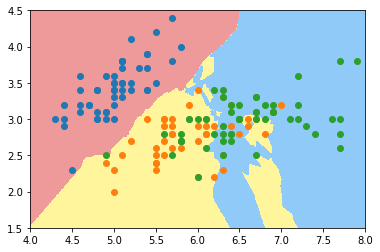

In [16]:
import numpy as np
import matplotlib.pyplot as plt

knn_best = gc.best_estimator_
X = iris.data[:,:2]
y = iris.target
knn_best.fit(X, y)

plot_decision_boundary(knn_best, axis=[4, 8, 1.5, 4.5])
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])
plt.scatter(X[y==2,0], X[y==2,1])
plt.show()